In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sns
from sklearn.linear_model import LinearRegression

In [5]:
plt.rcParams['font.family'] = 'Nanum Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [6]:
file_path = '/Users/leejeje/Desktop/2024 겨울학기/Data Science Lab/EDA Project/Datasets/Data_Major/Medical_Admission.csv'
data_medical = pd.read_csv(file_path, encoding='utf-8') 
print(data_medical.head())

   Unnamed: 0   입학정원 입학정원.1   모집인원 모집인원.1     지원자   지원자.1   지원자.2       지원자.3  \
0         NaN    정원내    정원외    정원내    정원외   지원자 계   지원자 계   지원자 계  정원 내 지원자 계   
1         NaN    정원내    정원외    정원내    정원외      전체      남자      여자          전체   
2      2014.0  1,678      0  1,662     80  35,177  23,691  11,486      33,912   
3      2015.0  2,350      0  2,307    102  52,263  34,817  17,446      50,875   
4      2016.0  2,310      0  2,311    102  56,143  36,539  19,604      54,725   

        지원자.4  ...       지원자.8    입학자  입학자.1  입학자.2       입학자.3       입학자.4  \
0  정원 내 지원자 계  ...  정원 외 지원자 계  입학자 계  입학자 계  입학자 계  정원 내 입학자 계  정원 내 입학자 계   
1          남자  ...          여자     전체     남자     여자          전체          남자   
2      22,963  ...         537  1,749  1,166    583       1,661       1,114   
3      33,980  ...         551  2,408  1,646    762       2,303       1,579   
4      35,799  ...         678  2,421  1,574    847       2,311       1,519   

        입학자.5       입학자.6       입학자.7 

In [7]:
df =data_medical.rename(columns={"Unnamed: 0": "Year", "입학자": "Total_Enrollment"})  

filtered_df = df[["Year", "Total_Enrollment"]].iloc[2:]  
filtered_df["Year"] = filtered_df["Year"].astype(int)  
filtered_df["Total_Enrollment"] = (
    filtered_df["Total_Enrollment"]
    .str.replace(",", "")
    .astype(int)
) 

In [8]:
print(filtered_df)

    Year  Total_Enrollment
2   2014              1749
3   2015              2408
4   2016              2421
5   2017              2421
6   2018              2701
7   2019              3067
8   2020              3084
9   2021              3099
10  2022              3136
11  2023              3148


In [9]:
filtered_df.to_csv('/Users/leejeje/Desktop/2024 겨울학기/Data Science Lab/EDA Project/Datasets/Data_Major/Medical_Admission_data.csv')

    Year  Total_Enrollment  Predicted_Enrollment
0   2014            1749.0                   NaN
1   2015            2408.0                   NaN
2   2016            2421.0                   NaN
3   2017            2421.0                   NaN
4   2018            2701.0                   NaN
5   2019            3067.0                   NaN
6   2020            3084.0                   NaN
7   2021            3099.0                   NaN
8   2022            3136.0                   NaN
9   2023            3148.0                   NaN
10  2024               NaN                3504.0
11  2025               NaN                3646.0
12  2026               NaN                3788.0
13  2027               NaN                3930.0
14  2028               NaN                4072.0
15  2029               NaN                4214.0
16  2030               NaN                4356.0
17  2031               NaN                4498.0
18  2032               NaN                4640.0
19  2033            

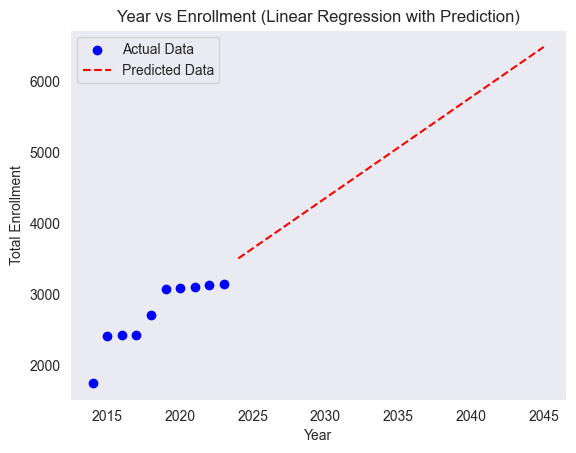

In [9]:
X = filtered_df["Year"].values.reshape(-1, 1)
y = filtered_df["Total_Enrollment"].values

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 2045년까지의 연도 데이터 생성
future_years = np.arange(2024, 2046).reshape(-1, 1)  # 2024년부터 2045년까지
future_predictions = model.predict(future_years)  # 예측 값 생성

# 예측 데이터프레임 생성
future_df = pd.DataFrame({
    "Year": future_years.flatten(),
    "Predicted_Enrollment": future_predictions.astype(int)
})

# 기존 데이터와 예측 데이터 합치기
combined_df = pd.concat([filtered_df, future_df], ignore_index=True)

# 결과 출력
print(combined_df)

# 시각화
plt.scatter(X, y, color="blue", label="Actual Data")  # 실제 데이터
plt.plot(future_years, future_predictions, color="red", linestyle="--", label="Predicted Data")  # 예측 데이터
plt.title("Year vs Enrollment (Linear Regression with Prediction)")
plt.xlabel("Year")
plt.ylabel("Total Enrollment")
plt.legend()
plt.grid()
plt.show()

In [109]:
file_path = '/Users/leejeje/Desktop/2024 겨울학기/Data Science Lab/EDA Project/Datasets/Data_Univ/대학교학생개황.csv'
data_univ = pd.read_csv(file_path, encoding='utf-8')
data_univ = data_univ[data_univ["학교구분명"] == "대학"]
keep_values = ['대학', '산업대학', '교육대학', '기술대학(대학과정)', '기술대학(전문대학과정)']
data_college = data_univ[data_univ["학제유형명"].isin(keep_values)]
data_college = data_college[['조사년도', '학교명', '시도명', '학과명', '대학교학생_입학생수', '대학교학생_재학생수']]

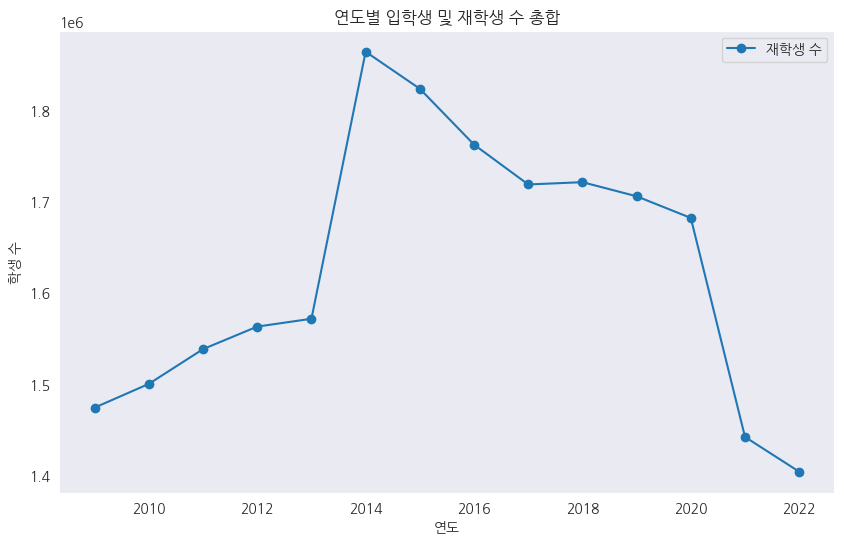

In [81]:
aggregated_data = data_college.groupby(['조사년도', '시도명'])[['대학교학생_입학생수', '대학교학생_재학생수']].sum().reset_index()

yearly_data = aggregated_data.groupby("조사년도")[["대학교학생_입학생수", "대학교학생_재학생수"]].sum().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
#plt.plot(yearly_data["조사년도"], yearly_data["대학교학생_입학생수"], label="입학생 수", marker="o")
plt.plot(yearly_data["조사년도"], yearly_data["대학교학생_재학생수"], label="재학생 수", marker="o")
plt.title("연도별 입학생 및 재학생 수 총합")
plt.xlabel("연도")
plt.ylabel("학생 수")
plt.legend()
plt.grid()
plt.show()

평행 이동값: 254882.0
    조사년도  대학교학생_입학생수  대학교학생_재학생수
0   2009      372453     1474200
1   2010      382010     1500206
2   2011      381758     1538265
3   2012      379658     1562952
4   2013      372431     1571511
5   2014     1522208     1609186
6   2015     1143074     1568598
7   2016      352528     1507422
8   2017      347403     1463753
9   2018      346676     1466289
10  2019      348688     1450823
11  2020      348227     1427095
12  2021      335576     1442070
13  2022      337355     1403962


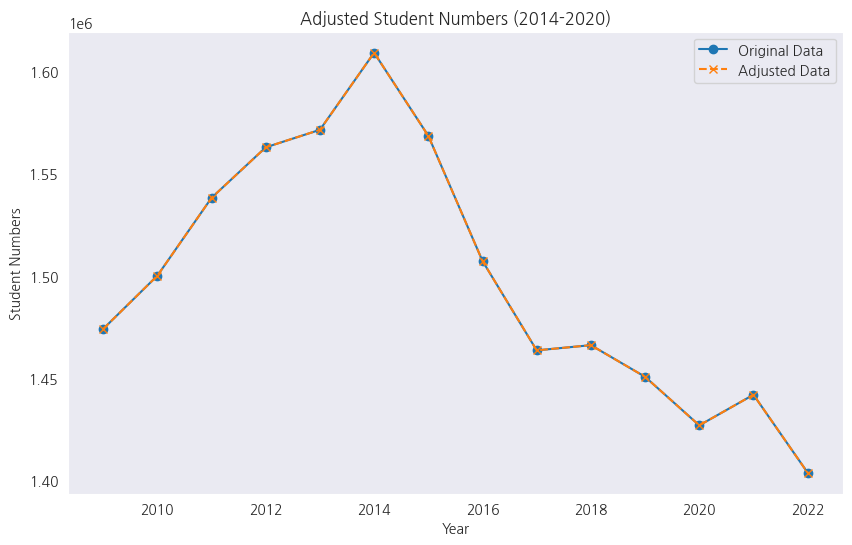

In [82]:
import pandas as pd

# 가상 데이터프레임 예제 (연도별 재학생 수)

df = pd.DataFrame(yearly_data)

# 1. 2009-2013 및 2021-2022년 데이터를 기준으로 평균 계산
reference_data = df[(df["조사년도"] <= 2013) | (df["조사년도"] >= 2021)]
reference_mean = reference_data["대학교학생_재학생수"].mean()

# 2. 2014-2020년 데이터의 평균 계산
abnormal_data = df[(df["조사년도"] >= 2014) & (df["조사년도"] <= 2020)]
abnormal_mean = abnormal_data["대학교학생_재학생수"].mean()

# 3. 평행 이동에 필요한 값 계산 (차이 계산)
adjustment_value = abnormal_mean - reference_mean
print(f"평행 이동값: {adjustment_value}")

# 4. 2014-2020년 데이터 수정
df.loc[(df["조사년도"] >= 2014) & (df["조사년도"] <= 2020), "대학교학생_재학생수"] -= adjustment_value

# 5. 결과 확인
print(df)


plt.figure(figsize=(10, 6))
plt.plot(df["조사년도"], yearly_data["대학교학생_재학생수"], marker="o", label="Original Data")
plt.plot(df["조사년도"], df["대학교학생_재학생수"], marker="x", linestyle="--", label="Adjusted Data")
plt.title("Adjusted Student Numbers (2014-2020)")
plt.xlabel("Year")
plt.ylabel("Student Numbers")
plt.legend()
plt.grid()
plt.show()

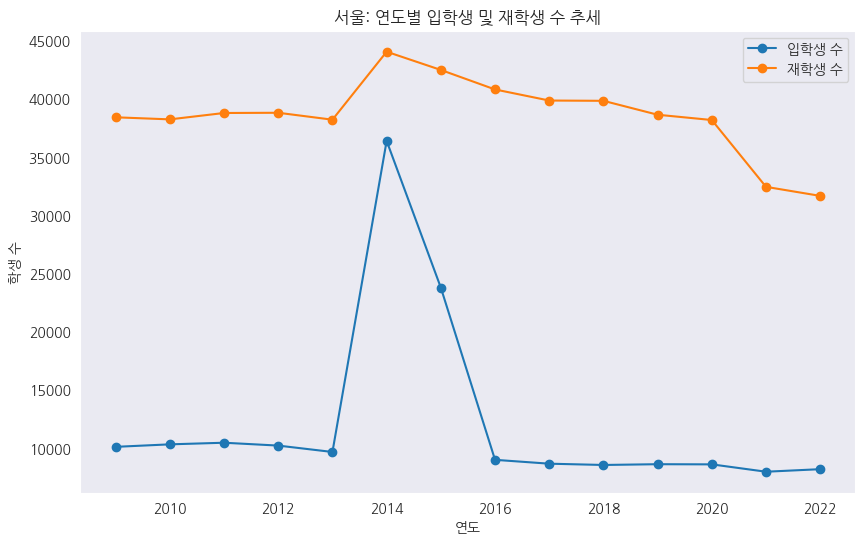

In [83]:
# 특정 시도 필터링 (예: 서울)
region_data = aggregated_data[aggregated_data["시도명"] == "전남"]

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(region_data["조사년도"], region_data["대학교학생_입학생수"], label="입학생 수", marker="o")
plt.plot(region_data["조사년도"], region_data["대학교학생_재학생수"], label="재학생 수", marker="o")
plt.title("서울: 연도별 입학생 및 재학생 수 추세")
plt.xlabel("연도")
plt.ylabel("학생 수")
plt.legend()
plt.grid()
plt.show()

In [128]:
filtered_data = aggregated_data[~aggregated_data["조사년도"].isin([2014, 2015])]

predicted_data = []

for region in filtered_data["시도명"].unique():

    region_data = filtered_data[filtered_data["시도명"] == region]

    X = region_data["조사년도"].values.reshape(-1, 1)
    y_enrollment = region_data["대학교학생_입학생수"].values
    
    enrollment_model = LinearRegression()
    enrollment_model.fit(X, y_enrollment)
    
    for year in [2014, 2015]:
        predicted_enrollment = enrollment_model.predict([[year]])[0]
        
        # 예측 값 추가
        predicted_data.append({
            "조사년도": year,
            "시도명": region,
            "대학교학생_입학생수": int(predicted_enrollment),
        })

filtered_final_data = aggregated_data[~aggregated_data["조사년도"].isin([2014, 2015])]

# 4. 예측 데이터로 대체
predicted_df = pd.DataFrame(predicted_data)
final_data = pd.concat([filtered_final_data, predicted_df]).sort_values(by=["시도명", "조사년도"]).reset_index(drop=True)
file_path = "/Users/leejeje/Desktop/2024 겨울학기/Data Science Lab/EDA Project/Datasets/Data_Univ/fin.csv"
final_data.to_csv(file_path, index=False, encoding="utf-8-sig")
# 5. 결과 확인
print(final_data.head(20))


    조사년도 시도명  대학교학생_입학생수  대학교학생_재학생수
0   2009  강원       19353     68904.0
1   2010  강원       19760     70847.0
2   2011  강원       19550     73358.0
3   2012  강원       19089     74329.0
4   2013  강원       19487     75780.0
5   2014  강원       18280         NaN
6   2015  강원       17921         NaN
7   2016  강원       17402     85077.0
8   2017  강원       16982     80809.0
9   2018  강원       16441     79235.0
10  2019  강원       16542     78049.0
11  2020  강원       17181     76962.0
12  2021  강원       15328     65285.0
13  2022  강원       15071     62192.0
14  2009  경기       48632    189713.0
15  2010  경기       47090    186823.0
16  2011  경기       46975    190904.0
17  2012  경기       44785    184706.0
18  2013  경기       43920    186327.0
19  2014  경기       44123         NaN


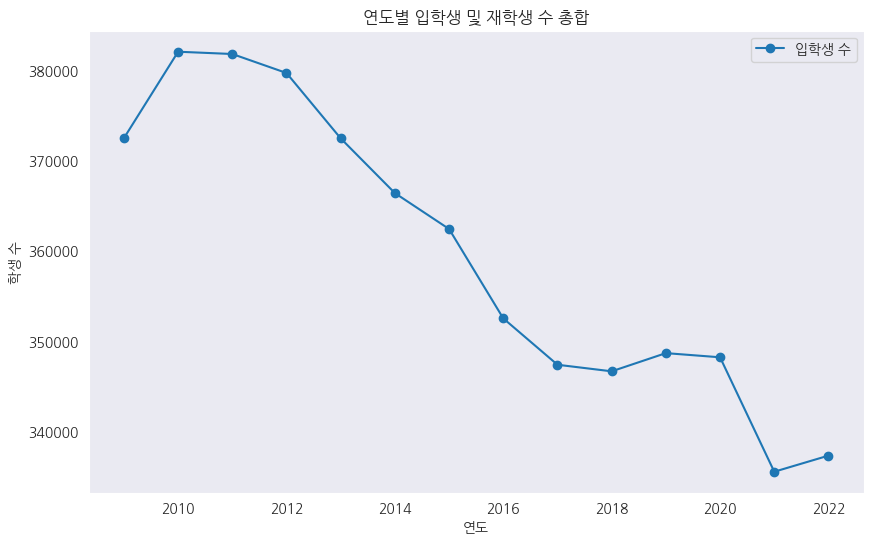

In [127]:
yearly_data = final_data.groupby("조사년도")[["대학교학생_입학생수", "대학교학생_재학생수"]].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_data["조사년도"], yearly_data["대학교학생_입학생수"], label="입학생 수", marker="o")
plt.title("연도별 입학생 및 재학생 수 총합")
plt.xlabel("연도")
plt.ylabel("학생 수")
plt.legend()
plt.grid()
plt.show()

In [86]:
yearly_data = yearly_data.rename(columns = {"조사년도": "Year"})
yearly_data = yearly_data[yearly_data["Year"] > 2013]

yearly_data = yearly_data.drop(columns=["대학교학생_재학생수"])
merged_df = pd.merge(yearly_data, filtered_df, on="Year")
merged_df["Medical_Ratio"] = merged_df["Total_Enrollment"] / merged_df["대학교학생_입학생수"]

In [87]:
print(merged_df)

   Year  대학교학생_입학생수  Total_Enrollment  Medical_Ratio
0  2014      366380              1749       0.004774
1  2015      362409              2408       0.006644
2  2016      352528              2421       0.006868
3  2017      347403              2421       0.006969
4  2018      346676              2701       0.007791
5  2019      348688              3067       0.008796
6  2020      348227              3084       0.008856
7  2021      335576              3099       0.009235
8  2022      337355              3136       0.009296


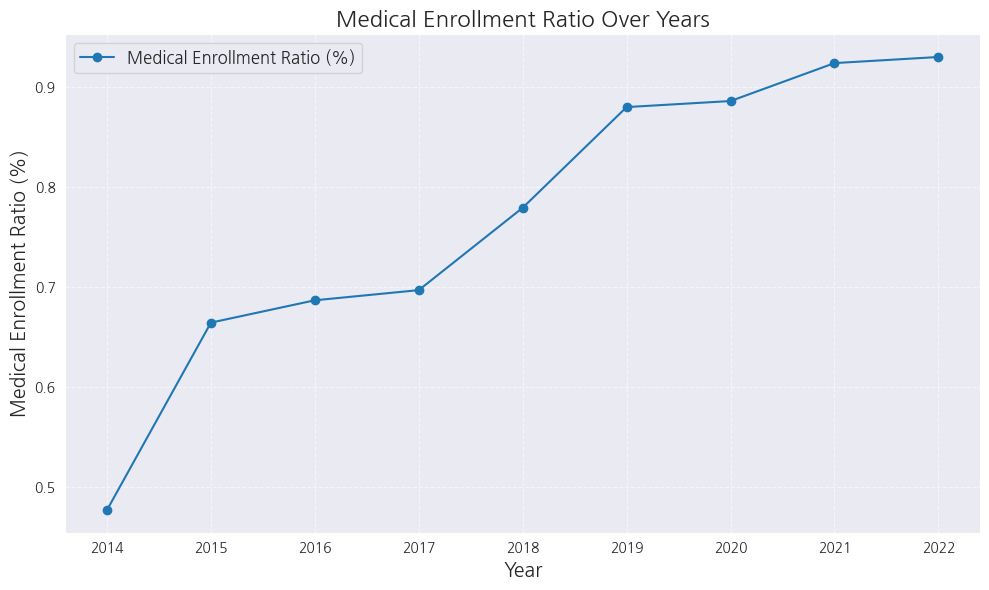

In [88]:
merged_df["Medical_Ratio_Percentage"] = merged_df["Medical_Ratio"] * 100

plt.figure(figsize=(10, 6))
plt.plot(merged_df["Year"], merged_df["Medical_Ratio_Percentage"], marker="o", linestyle="-", label="Medical Enrollment Ratio (%)")
plt.title("Medical Enrollment Ratio Over Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Medical Enrollment Ratio (%)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

    Year  대학교학생_입학생수  Total_Enrollment  Medical_Ratio  \
0   2014      366380            1749.0       0.004774   
1   2015      362409            2408.0       0.006644   
2   2016      352528            2421.0       0.006868   
3   2017      347403            2421.0       0.006969   
4   2018      346676            2701.0       0.007791   
5   2019      348688            3067.0       0.008796   
6   2020      348227            3084.0       0.008856   
7   2021      335576            3099.0       0.009235   
8   2022      337355            3136.0       0.009296   
9   2023      332478               NaN            NaN   
10  2024      329079               NaN            NaN   
11  2025      325681               NaN            NaN   
12  2026      322282               NaN            NaN   
13  2027      318883               NaN            NaN   
14  2028      315485               NaN            NaN   
15  2029      312086               NaN            NaN   
16  2030      308688           

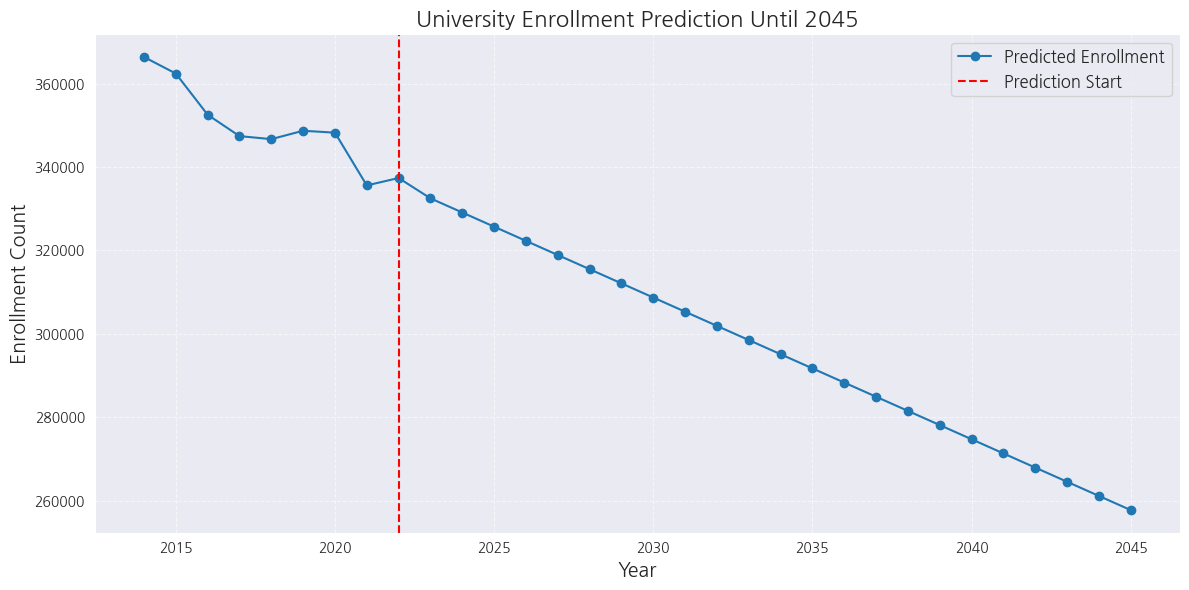

In [96]:
X = merged_df["Year"].values.reshape(-1, 1)  # 연도
y = merged_df["대학교학생_입학생수"].values  # 입학생 수

model = LinearRegression()
model.fit(X, y)

future_years = np.arange(2023, 2046).reshape(-1, 1)
future_predictions = model.predict(future_years)

future_data = pd.DataFrame({
    "Year": future_years.flatten(),
    "대학교학생_입학생수": future_predictions.astype(int)
})

merged_with_future = pd.concat([merged_df, future_data]).reset_index(drop=True)

    Year  대학교학생_입학생수  Total_Enrollment  Medical_Ratio  \
0   2014      366380            1749.0       0.004774   
1   2015      362409            2408.0       0.006644   
2   2016      352528            2421.0       0.006868   
3   2017      347403            2421.0       0.006969   
4   2018      346676            2701.0       0.007791   
5   2019      348688            3067.0       0.008796   
6   2020      348227            3084.0       0.008856   
7   2021      335576            3099.0       0.009235   
8   2022      337355            3136.0       0.009296   
9   2023      332478            3136.0       0.009432   
10  2024      329079            3136.0       0.009530   
11  2025      325681            3136.0       0.009629   
12  2026      322282            3136.0       0.009731   
13  2027      318883            3136.0       0.009834   
14  2028      315485            3136.0       0.009940   
15  2029      312086            3136.0       0.010049   
16  2030      308688           

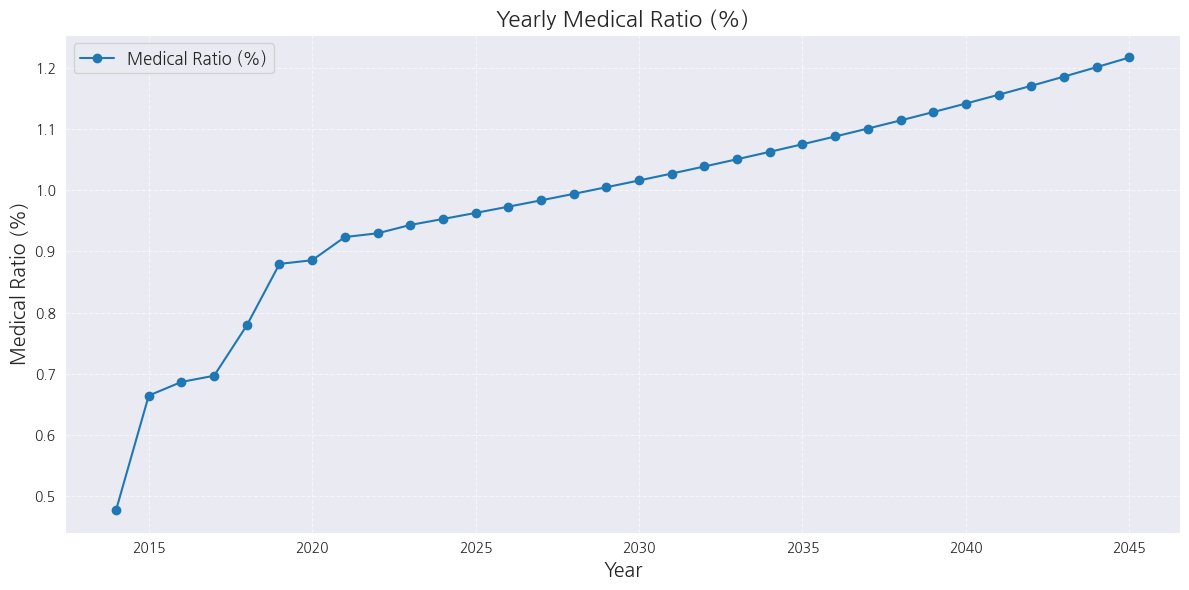

In [104]:
merged_with_future.loc[merged_with_future["Year"] >= 2023, "Total_Enrollment"] = 3136
merged_with_future["Medical_Ratio"] = merged_with_future["Total_Enrollment"] / merged_with_future["대학교학생_입학생수"]
merged_with_future["Medical_Ratio_Percentage"] = merged_with_future["Medical_Ratio"] * 100
print(merged_with_future.head(20))

plt.figure(figsize=(12, 6))

# Medical Ratio Percentage 시각화
plt.plot(
    merged_with_future["Year"], 
    merged_with_future["Medical_Ratio_Percentage"], 
    marker="o", 
    linestyle="-", 
    label="Medical Ratio (%)"
)

# 그래프 설정
plt.title("Yearly Medical Ratio (%)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Medical Ratio (%)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

# 그래프 출력
plt.show()

In [108]:
print(data_college)

        조사년도        학교명 시도명  대학교학생_입학생수  대학교학생_재학생수
0       2009    광주여자대학교  광주           0           0
1       2009    광주여자대학교  광주           0           0
2       2009    광주여자대학교  광주          42         158
3       2009    광주여자대학교  광주          49         210
4       2009    광주여자대학교  광주          24         109
...      ...        ...  ..         ...         ...
262582  2022  가톨릭꽃동네대학교  충북           0          22
262583  2022  가톨릭꽃동네대학교  충북          82         237
262584  2022  가톨릭꽃동네대학교  충북           0           0
262585  2022  가톨릭꽃동네대학교  충북           0           8
262586  2022  가톨릭꽃동네대학교  충북          11          25

[248993 rows x 5 columns]


In [110]:
data_college = data_college.drop(columns=["학과명"])
aggregated_df = data_college.groupby(["조사년도", "학교명", "시도명"], as_index=False).sum()
zero_years_df = aggregated_df[aggregated_df["대학교학생_입학생수"] == 0].groupby(["학교명", "시도명"])["조사년도"].apply(list).reset_index()
zero_years_df.rename(columns={"조사년도": "입학생_0인_연도"}, inplace=True)

final_df = aggregated_df.merge(zero_years_df, on=["학교명", "시도명"], how="left")

# 5. 결과 확인
print(final_df)

      조사년도       학교명 시도명  대학교학생_입학생수  대학교학생_재학생수  \
0     2009     가야대학교  경남         616        2312   
1     2009     가야대학교  경북          38         143   
2     2009     가천대학교  경기        3555       11706   
3     2009  가천의과학대학교  인천         900        3756   
4     2009  가톨릭관동대학교  강원        2621        8113   
...    ...       ...  ..         ...         ...   
3211  2022   호남신학대학교  광주         119         494   
3212  2022     호서대학교  충남        3087       11758   
3213  2022     호원대학교  전북        1376        5362   
3214  2022     홍익대학교  서울        2876       12163   
3215  2022     홍익대학교  세종        1383        5385   

                                       입학생_0인_연도  
0                                            NaN  
1     [2013, 2017, 2018, 2019, 2020, 2021, 2022]  
2                                            NaN  
3                                         [2012]  
4                                            NaN  
...                                          ...  
3211              

In [114]:
file_path = "/Users/leejeje/Desktop/2024 겨울학기/Data Science Lab/EDA Project/Datasets/Data_Univ/Vanishing.csv"
final_df.to_csv(file_path, index=False, encoding="utf-8-sig")

In [116]:
final_df["최초_입학생_0_연도"] = final_df["입학생_0인_연도"].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)

# 2. 시도별 연도별 Counting
counting_df = final_df.groupby(["시도명", "최초_입학생_0_연도"]).size().reset_index(name="Count")

print(counting_df)

   시도명  최초_입학생_0_연도  Count
0   강원       2009.0      2
1   경기       2011.0     14
2   경기       2012.0     28
3   경기       2014.0     18
4   경남       2009.0      9
5   경남       2022.0     14
6   경북       2009.0      4
7   경북       2013.0     18
8   경북       2015.0     14
9   경북       2018.0     10
10  광주       2009.0      7
11  대구       2009.0      2
12  대전       2009.0      1
13  부산       2009.0     15
14  부산       2020.0     14
15  인천       2012.0      4
16  인천       2017.0     14
17  전남       2022.0     14
18  전북       2018.0     10
19  제주       2009.0      5
20  충남       2016.0      5
21  충남       2018.0     10


In [126]:
all_regions = ['광주', '전북', '대전', '서울', '충남', '강원', '전남', '경북', '대구', '경기', 
               '경남', '부산', '인천', '울산', '제주', '충북', '세종']

all_years = np.arange(counting_df["최초_입학생_0_연도"].min(), counting_df["최초_입학생_0_연도"].max() + 1)

all_combinations = pd.MultiIndex.from_product([all_regions, all_years], names=["시도명", "최초_입학생_0_연도"]).to_frame(index=False)

complete_df = pd.merge(all_combinations, counting_df, on=["시도명", "최초_입학생_0_연도"], how="left")

complete_df["Count"] = complete_df["Count"].fillna(0).astype(int)

print(complete_df)
file_path = ("/Users/leejeje/Desktop/2024 겨울학기/Data Science Lab/EDA Project/Datasets/Data_Univ/complete.csv")
complete_df.to_csv(file_path, index=False, encoding="utf-8-sig")

    시도명  최초_입학생_0_연도  Count
0    광주       2009.0      7
1    광주       2010.0      0
2    광주       2011.0      0
3    광주       2012.0      0
4    광주       2013.0      0
..   ..          ...    ...
233  세종       2018.0      0
234  세종       2019.0      0
235  세종       2020.0      0
236  세종       2021.0      0
237  세종       2022.0      0

[238 rows x 3 columns]


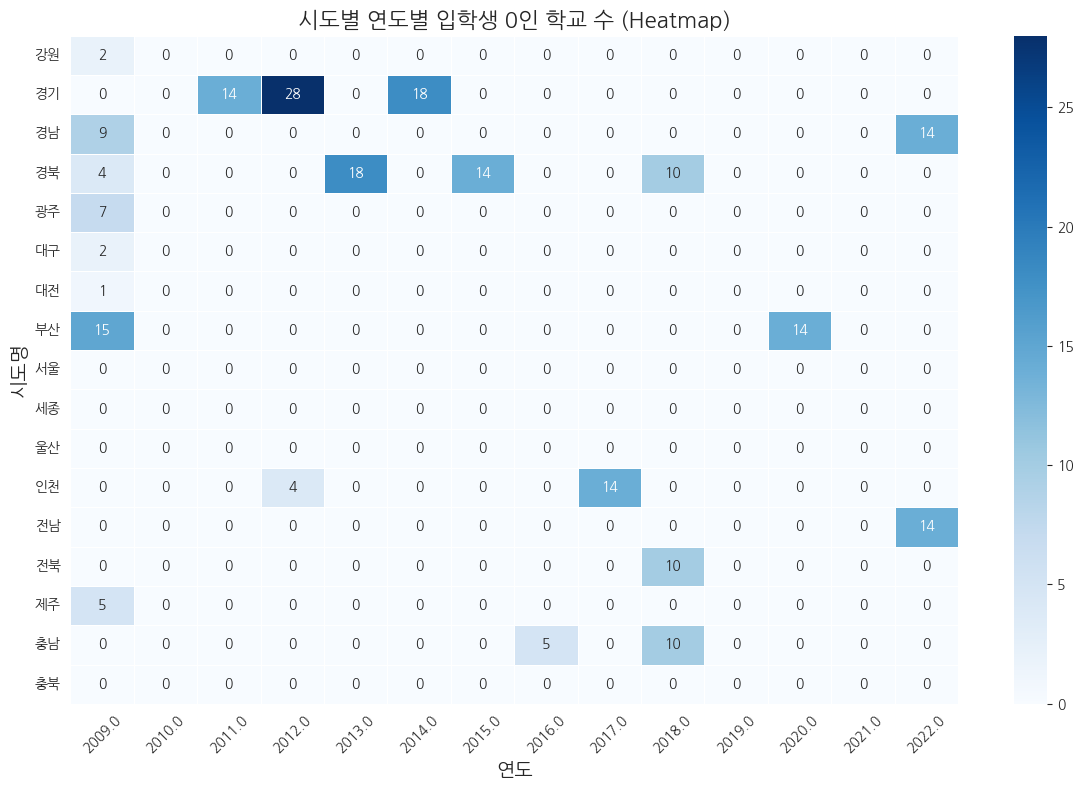

In [124]:
plt.figure(figsize=(12, 8))

heatmap_data = complete_df.pivot(index="시도명", columns="최초_입학생_0_연도", values="Count")

sns.heatmap(heatmap_data, annot=True, cmap="Blues", fmt=".0f", linewidths=0.5)

plt.title("시도별 연도별 입학생 0인 학교 수 (Heatmap)", fontsize=16)
plt.xlabel("연도", fontsize=14)
plt.ylabel("시도명", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()